## Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

Using TensorFlow backend.


In [2]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
# Hint 1 : 在 Dense 層中增加 Regularizers
# Hint 2 : 增加 Dropout 層並設定 dropout ratio 
# Hint 3 : 增加 Batch-normalization 層
from keras.regularizers import l2, l1_l2
from keras.layers import Input, Dense, Dropout, BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32], regulizer=l2, regulizer_ratio=1e-7, 
              dropout=False, drop_ratio=0.2, batchnormalization=False):
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), 
                      kernel_regularizer=regulizer(regulizer_ratio))(input_layer)
            if dropout == True:
                x = Dropout(drop_ratio)(x)
            if batchnormalization == True:
                x = BatchNormalization()(x)    
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), 
                      kernel_regularizer=regulizer(regulizer_ratio))(x)
            if dropout == True:
                x = Dropout(drop_ratio)(x)
            if batchnormalization == True:
                x = BatchNormalization()(x)   
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
regulizer = [l2, l1_l2]
regulizer_ratio = [1e-7, 1e-10]
dropout = [False, True, False]
batchnormalization = [False, False, True]

In [5]:
results = {}
"""
Write your training loop and record results
"""
for reg in regulizer:
    for reg_ra in regulizer_ratio:
        for d_b in zip(dropout, batchnormalization):
            keras.backend.clear_session() # 把舊的 Graph 清掉
            print(f'regulizer = {reg}, regulizer_ratio = {reg_ra}, dropout = {d_b[0]}, batchnormalization = {d_b[1]}')
            model = build_mlp(input_shape=x_train.shape[1:], regulizer=reg, regulizer_ratio=reg_ra, 
                              dropout=d_b[0], batchnormalization=d_b[1])
            model.summary()
            optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.9)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

            model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), 
                      shuffle=True)

            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["acc"]
            valid_acc = model.history.history["val_acc"]

            name_tag = f'regulizer = {reg}, regulizer_ratio = {reg_ra}, dropout = {d_b[0]}, batchnormalization = {d_b[1]}'
            results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                                 'train-acc': train_acc, 'valid-acc': valid_acc}
        

regulizer = <function l2 at 0x00000225BD7BEBF8>, regulizer_ratio = 1e-07, dropout = False, batchnormalization = False
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,643,498
Trainable params: 1,643,498
Non-trainable params: 0
________

50000/50000 [==============================] - 6s 117us/step - loss: 0.6214 - acc: 0.7769 - val_loss: 2.0323 - val_acc: 0.4752
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.5956 - acc: 0.7883 - val_loss: 1.7583 - val_acc: 0.5261
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.5830 - acc: 0.7891 - val_loss: 1.8681 - val_acc: 0.5076
Epoch 50/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5726 - acc: 0.7956 - val_loss: 1.8183 - val_acc: 0.5254
regulizer = <function l2 at 0x00000225BD7BEBF8>, regulizer_ratio = 1e-07, dropout = True, batchnormalization = False
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________________

50000/50000 [==============================] - 5s 102us/step - loss: 1.2566 - acc: 0.5562 - val_loss: 1.3388 - val_acc: 0.5231
Epoch 43/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2459 - acc: 0.5583 - val_loss: 1.3332 - val_acc: 0.5238
Epoch 44/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2382 - acc: 0.5603 - val_loss: 1.3013 - val_acc: 0.5363
Epoch 45/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.2375 - acc: 0.5601 - val_loss: 1.3056 - val_acc: 0.5383
Epoch 46/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2266 - acc: 0.5646 - val_loss: 1.3111 - val_acc: 0.5348
Epoch 47/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2255 - acc: 0.5636 - val_loss: 1.3261 - val_acc: 0.5329
Epoch 48/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.2163 - acc: 0.5701 - val_loss: 1.3026 - val_acc: 0.5391
Epoch 49/50
50000/50000 [==============

Epoch 40/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6737 - acc: 0.7600 - val_loss: 2.1196 - val_acc: 0.4347
Epoch 41/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.6625 - acc: 0.7637 - val_loss: 2.1539 - val_acc: 0.4288
Epoch 42/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.6491 - acc: 0.7687 - val_loss: 2.1183 - val_acc: 0.4407
Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6489 - acc: 0.7711 - val_loss: 2.1260 - val_acc: 0.4325
Epoch 44/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.6367 - acc: 0.7719 - val_loss: 1.9947 - val_acc: 0.4569
Epoch 45/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.6387 - acc: 0.7720 - val_loss: 2.0092 - val_acc: 0.4567
Epoch 46/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.6190 - acc: 0.7790 - val_loss: 2.0967 - val_acc: 0.4598
Epoch 47/50
50000/50000 [==

50000/50000 [==============================] - 6s 118us/step - loss: 0.7364 - acc: 0.7364 - val_loss: 1.6389 - val_acc: 0.5113
Epoch 41/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.7089 - acc: 0.7477 - val_loss: 1.6878 - val_acc: 0.5168
Epoch 42/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.6960 - acc: 0.7513 - val_loss: 1.6306 - val_acc: 0.5176
Epoch 43/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.6851 - acc: 0.7548 - val_loss: 1.6031 - val_acc: 0.5373
Epoch 44/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.6618 - acc: 0.7629 - val_loss: 1.6656 - val_acc: 0.5236
Epoch 45/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.6487 - acc: 0.7667 - val_loss: 1.7603 - val_acc: 0.4998
Epoch 46/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.6362 - acc: 0.7731 - val_loss: 1.7439 - val_acc: 0.5116
Epoch 47/50
50000/50000 [==============

Epoch 38/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2852 - acc: 0.5444 - val_loss: 1.3273 - val_acc: 0.5344
Epoch 39/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.2739 - acc: 0.5491 - val_loss: 1.3404 - val_acc: 0.5210
Epoch 40/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.2683 - acc: 0.5496 - val_loss: 1.3341 - val_acc: 0.5250
Epoch 41/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.2580 - acc: 0.5549 - val_loss: 1.3032 - val_acc: 0.5353
Epoch 42/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.2524 - acc: 0.5581 - val_loss: 1.3117 - val_acc: 0.5353
Epoch 43/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.2499 - acc: 0.5550 - val_loss: 1.3255 - val_acc: 0.5226
Epoch 44/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.2451 - acc: 0.5596 - val_loss: 1.3062 - val_acc: 0.5352
Epoch 45/50
50000/50000 [==

50000/50000 [==============================] - 7s 142us/step - loss: 0.7467 - acc: 0.7319 - val_loss: 1.9348 - val_acc: 0.4557
Epoch 36/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.7289 - acc: 0.7383 - val_loss: 2.0740 - val_acc: 0.4404 ET
Epoch 37/50
50000/50000 [==============================] - 7s 146us/step - loss: 0.7251 - acc: 0.7410 - val_loss: 1.9375 - val_acc: 0.4433
Epoch 38/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.7088 - acc: 0.7450 - val_loss: 2.1535 - val_acc: 0.4377
Epoch 39/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.6956 - acc: 0.7493 - val_loss: 2.2673 - val_acc: 0.4155
Epoch 40/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.6873 - acc: 0.7529 - val_loss: 1.9641 - val_acc: 0.4386
Epoch 41/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.6795 - acc: 0.7567 - val_loss: 1.9010 - val_acc: 0.4762
Epoch 42/50
50000/50000 [===========

50000/50000 [==============================] - 6s 116us/step - loss: 1.7549 - acc: 0.4501 - val_loss: 1.7319 - val_acc: 0.4578
Epoch 36/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7673 - acc: 0.4456 - val_loss: 1.8823 - val_acc: 0.4186
Epoch 37/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7607 - acc: 0.4491 - val_loss: 1.9165 - val_acc: 0.3800
Epoch 38/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7633 - acc: 0.4456 - val_loss: 1.8308 - val_acc: 0.4162
Epoch 39/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.7539 - acc: 0.4498 - val_loss: 2.0630 - val_acc: 0.3642
Epoch 40/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7576 - acc: 0.4495 - val_loss: 1.7792 - val_acc: 0.4379
Epoch 41/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7960 - acc: 0.4430 - val_loss: 2.2559 - val_acc: 0.3274
Epoch 42/50
50000/50000 [==============

Epoch 33/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8487 - acc: 0.3977 - val_loss: 1.8068 - val_acc: 0.4091
Epoch 34/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8439 - acc: 0.4012 - val_loss: 1.8146 - val_acc: 0.4056
Epoch 35/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8409 - acc: 0.4030 - val_loss: 1.7646 - val_acc: 0.4253
Epoch 36/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8380 - acc: 0.4019 - val_loss: 1.9387 - val_acc: 0.3866
Epoch 37/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8473 - acc: 0.4011 - val_loss: 1.8867 - val_acc: 0.3825
Epoch 38/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8524 - acc: 0.3974 - val_loss: 1.8183 - val_acc: 0.4097
Epoch 39/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8468 - acc: 0.3999 - val_loss: 1.7664 - val_acc: 0.4339
Epoch 40/50
50000/50000 [==

Epoch 31/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5162 - acc: 0.5260 - val_loss: 2.0023 - val_acc: 0.3846
Epoch 32/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5133 - acc: 0.5229 - val_loss: 3.2901 - val_acc: 0.2150
Epoch 33/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5135 - acc: 0.5252 - val_loss: 2.0720 - val_acc: 0.3323
Epoch 34/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5232 - acc: 0.5248 - val_loss: 2.1529 - val_acc: 0.3785
Epoch 35/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5149 - acc: 0.5282 - val_loss: 1.8972 - val_acc: 0.3873
Epoch 36/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5336 - acc: 0.5187 - val_loss: 2.0427 - val_acc: 0.3609
Epoch 37/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5227 - acc: 0.5233 - val_loss: 1.9329 - val_acc: 0.3962
Epoch 38/50
50000/50000 [==

50000/50000 [==============================] - 6s 111us/step - loss: 1.7626 - acc: 0.4464 - val_loss: 1.7883 - val_acc: 0.4311
Epoch 32/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.7521 - acc: 0.4509 - val_loss: 1.7554 - val_acc: 0.4449
Epoch 33/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7543 - acc: 0.4498 - val_loss: 1.8862 - val_acc: 0.4022
Epoch 34/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7713 - acc: 0.4457 - val_loss: 1.8373 - val_acc: 0.4207
Epoch 35/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7592 - acc: 0.4496 - val_loss: 1.8389 - val_acc: 0.4194
Epoch 36/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7468 - acc: 0.4532 - val_loss: 1.8894 - val_acc: 0.4011
Epoch 37/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7438 - acc: 0.4540 - val_loss: 1.7910 - val_acc: 0.4317
Epoch 38/50
50000/50000 [==============

Epoch 29/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8453 - acc: 0.4001 - val_loss: 1.8479 - val_acc: 0.4156
Epoch 30/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8578 - acc: 0.4004 - val_loss: 1.8058 - val_acc: 0.4291
Epoch 31/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8448 - acc: 0.4032 - val_loss: 1.8431 - val_acc: 0.3816
Epoch 32/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8496 - acc: 0.3995 - val_loss: 1.8708 - val_acc: 0.3832
Epoch 33/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8449 - acc: 0.4033 - val_loss: 2.0666 - val_acc: 0.3343
Epoch 34/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8478 - acc: 0.4019 - val_loss: 1.8560 - val_acc: 0.3844
Epoch 35/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8524 - acc: 0.3979 - val_loss: 1.8473 - val_acc: 0.3912
Epoch 36/50
50000/50000 [==

Epoch 27/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5180 - acc: 0.5229 - val_loss: 1.8896 - val_acc: 0.3956
Epoch 28/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5211 - acc: 0.5251 - val_loss: 1.9029 - val_acc: 0.3955
Epoch 29/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5329 - acc: 0.5177 - val_loss: 2.0546 - val_acc: 0.3724
Epoch 30/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.5390 - acc: 0.5165 - val_loss: 2.0943 - val_acc: 0.3503
Epoch 31/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5315 - acc: 0.5199 - val_loss: 2.2198 - val_acc: 0.3177
Epoch 32/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5259 - acc: 0.5196 - val_loss: 2.1584 - val_acc: 0.3419
Epoch 33/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5213 - acc: 0.5203 - val_loss: 1.9977 - val_acc: 0.3832
Epoch 34/50
50000/50000 [==

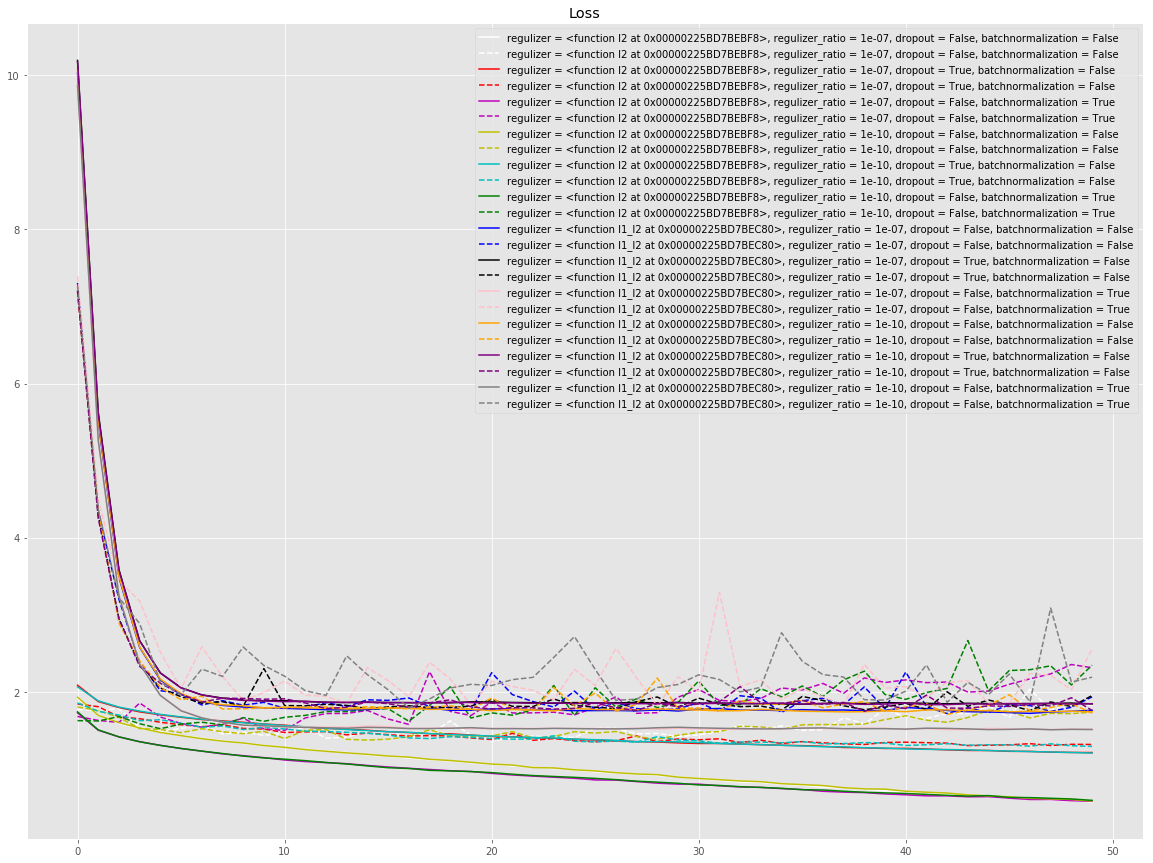

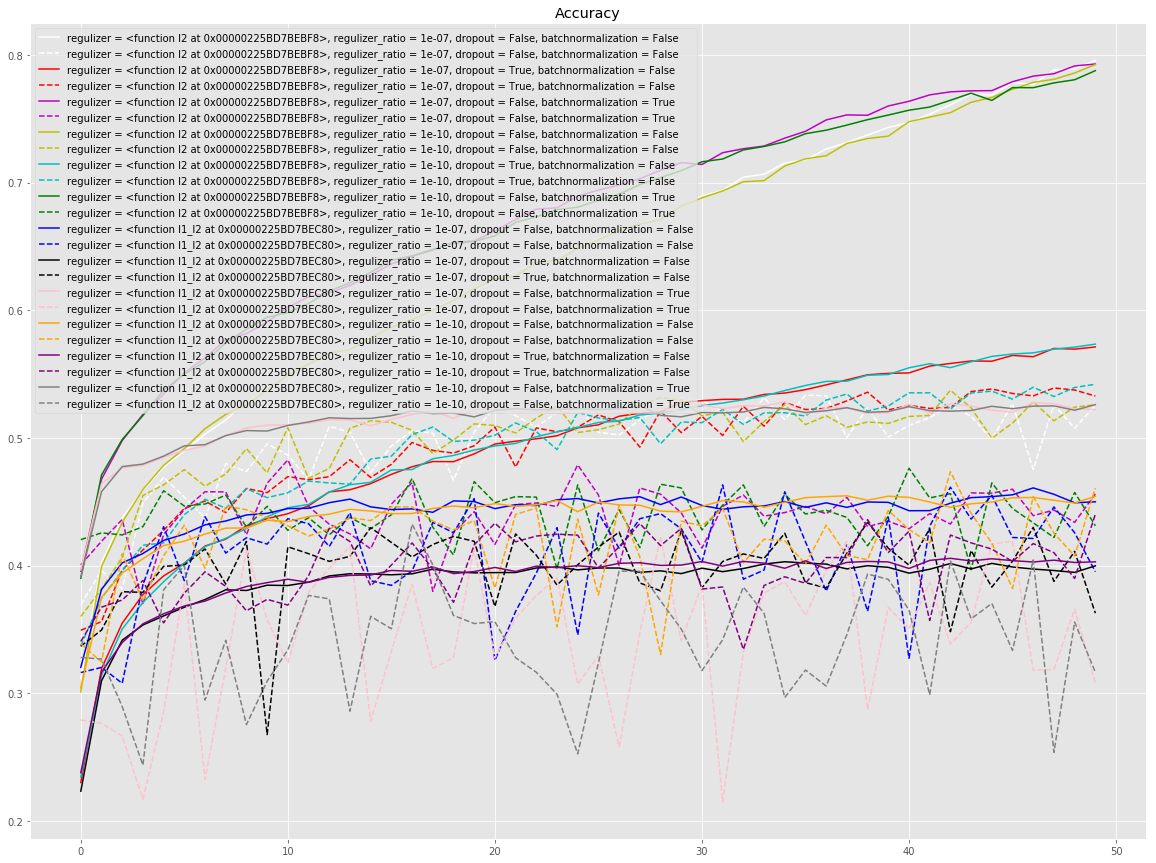

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
plt.style.use('ggplot')
color_bar = ['w', 'r', 'm', 'y', 'c', 'g', 'b', 'k', 'pink', 'orange', 'purple', 'gray']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()